In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
# Extract titles 
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Normalize variants
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Group rare titles
rare_titles = ['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Encode titles
le = LabelEncoder()
df['Title'] = le.fit_transform(df['Title'])

# Drop the original 'Name' column
df.drop(columns=['Name'], inplace=True)

# Check counts
print(df['Title'].value_counts())


Title
2    517
1    185
3    126
0     40
4     23
Name: count, dtype: int64


In [6]:
df['Title'].unique()

array([2, 3, 1, 0, 4])

In [7]:
print(list(le.classes_))


['Master', 'Miss', 'Mr', 'Mrs', 'Rare']


In [8]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


In [ ]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode (most frequent port)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column — too many missing values
df.drop(columns=['Cabin'], inplace=True,errors='ignore')

# Drop Ticket and Name 
df.drop(columns=['Ticket'], inplace=True,errors='ignore')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_30236\949832898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_30236\949832898.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [10]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64


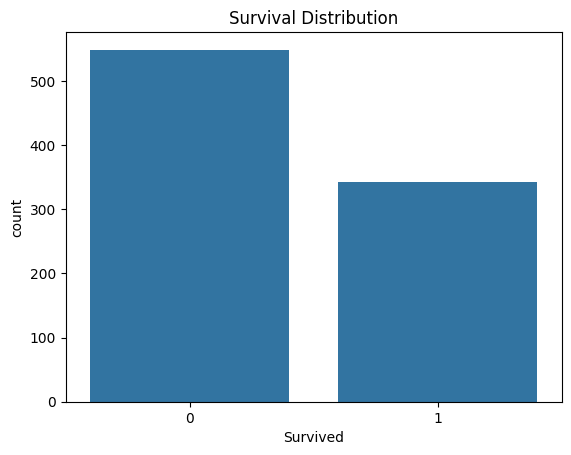

In [49]:

# Survival distribution
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.savefig('survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()




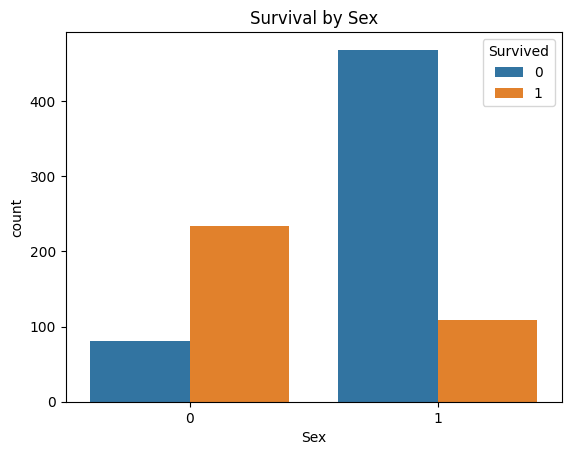

In [50]:
# Survival by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.savefig('Survival_by_Sex', dpi=300, bbox_inches='tight')
plt.show()



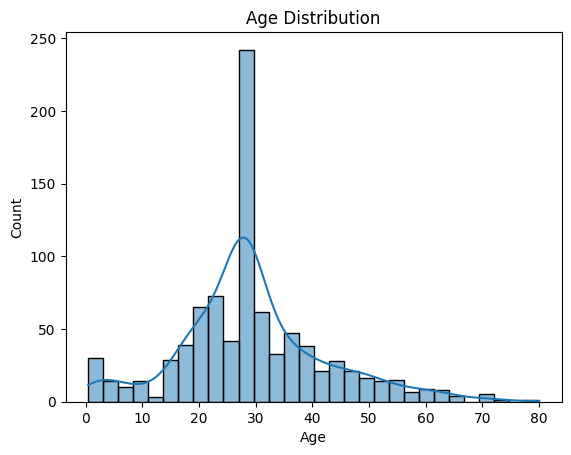

In [51]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.savefig('Age_Distribution', dpi=300, bbox_inches='tight')
plt.show()



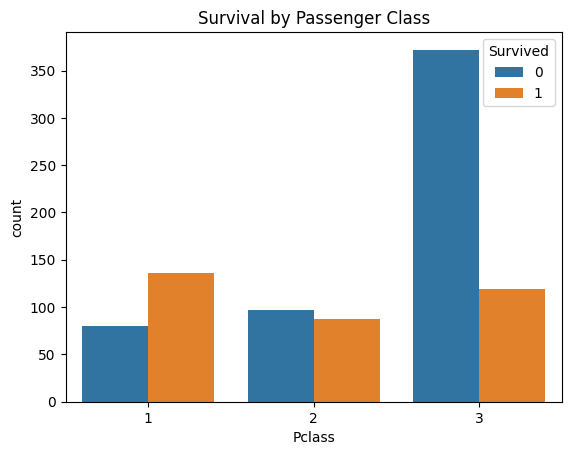

In [52]:
# Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.savefig('Survival_by_Passenger_Class', dpi=300, bbox_inches='tight')
plt.show()

Survival by Title

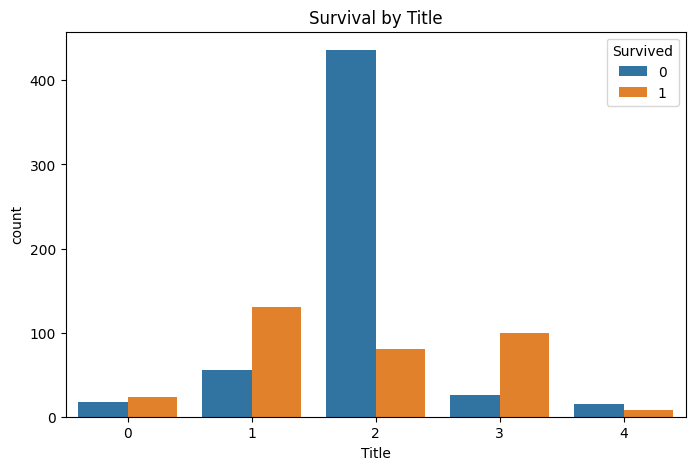

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival by Title')
plt.savefig('Survival_by_Title', dpi=300, bbox_inches='tight')
plt.show()


Fare distribution by Pclass and Survival

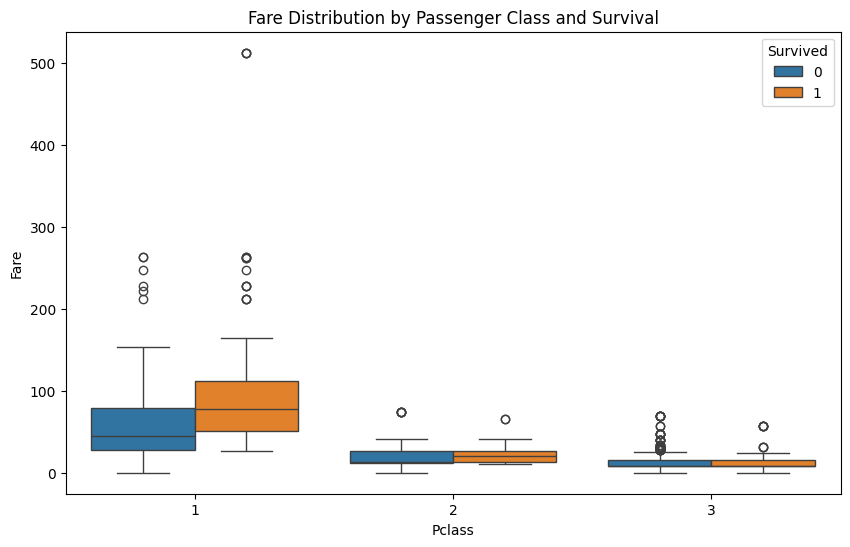

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare Distribution by Passenger Class and Survival')
plt.savefig('Fare_Distribution_by_Passenger_Class_and_Survival', dpi=300, bbox_inches='tight')
plt.show()

Survival by Pclass (you already have it but here's a refined version)

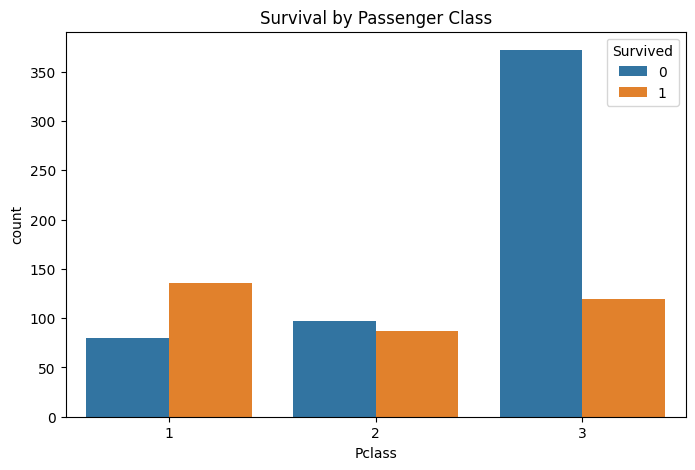

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.savefig('Survival_by_Passenger_Class', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Features and label
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


Random Forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



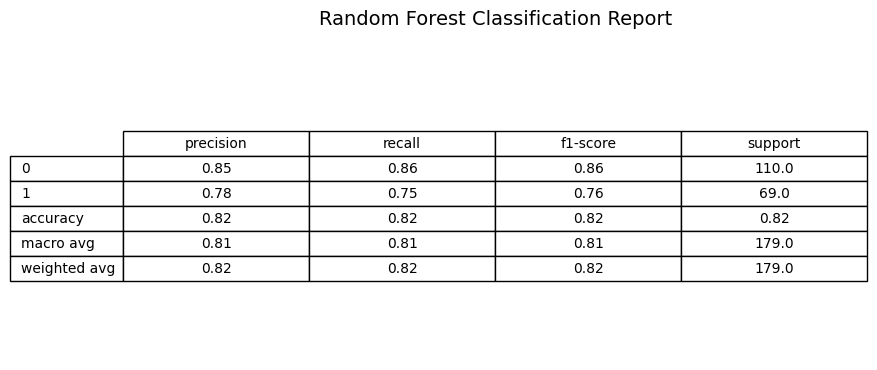

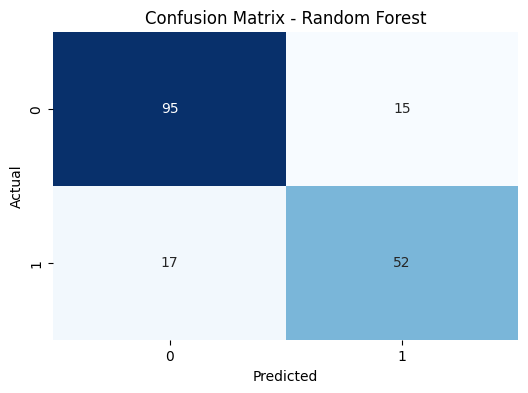

In [ ]:
# Fit the model once
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict once and store the prediction
y_pred = rf.predict(X_test)

# Print accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

# Generate classification report and print
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Create and display classification report table
df_report = pd.DataFrame(report).transpose().round(2)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=df_report.values,
                 colLabels=df_report.columns,
                 rowLabels=df_report.index,
                 cellLoc='center',
                 loc='center')
table.scale(1.2, 1.5)
plt.title('Random Forest Classification Report', fontsize=14, pad=20)
plt.savefig('Random_Forest_classification_report.png', bbox_inches='tight', dpi=300)
plt.show()

# Compute confusion matrix from the exact same predictions
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.savefig('confusion_matrix_rf.png', bbox_inches='tight', dpi=300)
plt.show()

XGBoost Accuracy: 0.8156424581005587



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



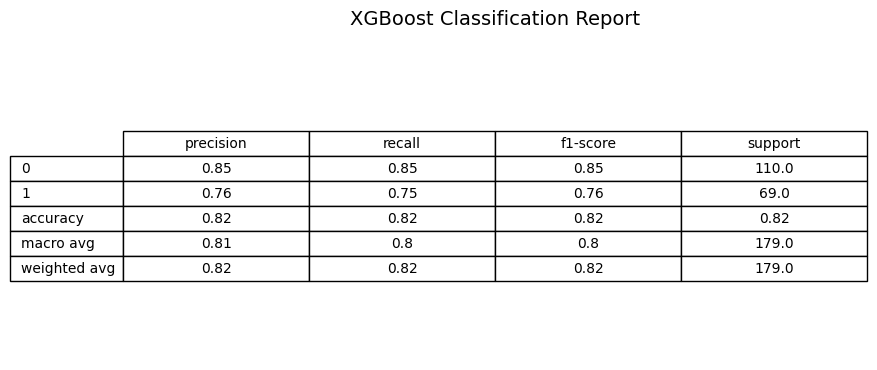

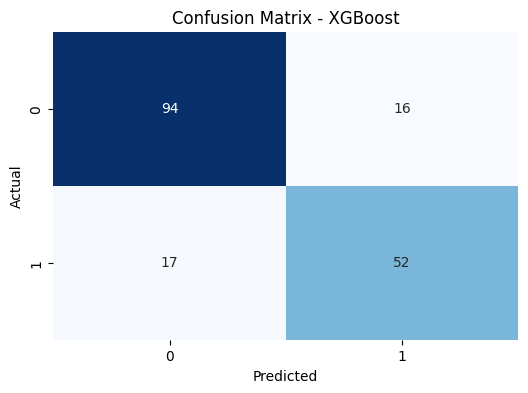

In [ ]:

!pip install xgboost
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy and classification report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Classification report (print + table)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
print(classification_report(y_test, y_pred_xgb))

# Create table and save as image
df_report_xgb = pd.DataFrame(report_xgb).transpose().round(2)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=df_report_xgb.values,
                 colLabels=df_report_xgb.columns,
                 rowLabels=df_report_xgb.index,
                 cellLoc='center',
                 loc='center')
table.scale(1.2, 1.5)
plt.title('XGBoost Classification Report', fontsize=14, pad=20)
plt.savefig('xgboost_classification_report.png', bbox_inches='tight', dpi=300)
plt.show()

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.savefig('confusion_matrix_xgboost.png', bbox_inches='tight', dpi=300)
plt.show()


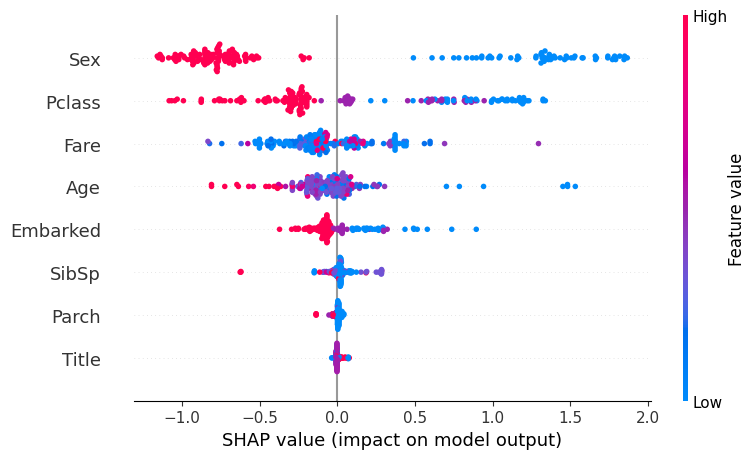

In [101]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer and compute SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Use SHAP's built-in saving by redirecting to matplotlib (non-interactive mode)
shap.summary_plot(shap_values, X_test, show=True)  # Don't show immediately
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.close()


In [75]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best XGBoost Score:", grid_xgb.best_score_)



Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Best XGBoost Score: 0.8245149216980204


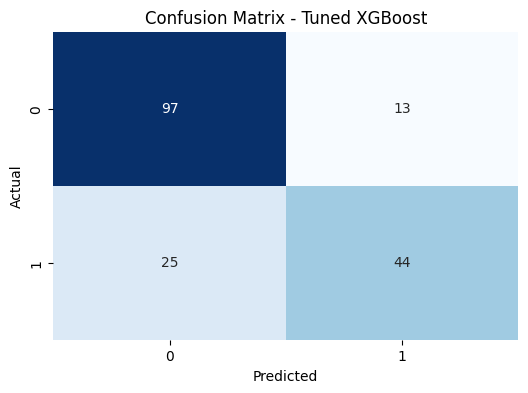

In [76]:
# Get best model
best_xgb = grid_xgb.best_estimator_

# Predict
y_pred = best_xgb.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot and save
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.savefig('confusion_matrix_tuned_xgboost.png', bbox_inches='tight', dpi=300)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)


Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RF Score: 0.8259233724022457


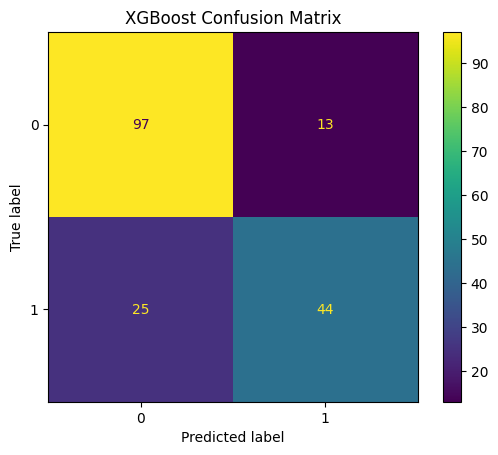

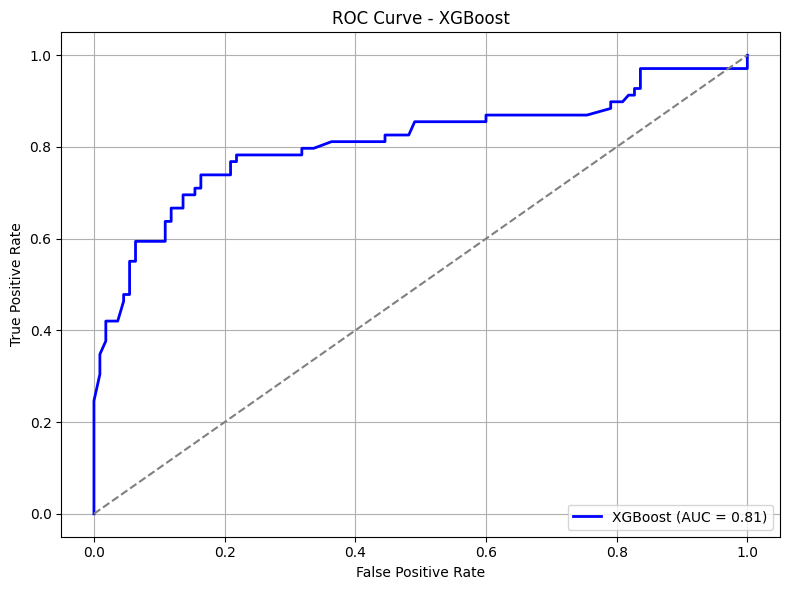

XGBoost ROC AUC: 0.8099472990777339


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --- Predictions ---
y_pred_xgb = grid_xgb.predict(X_test)
y_proba_xgb = grid_xgb.predict_proba(X_test)[:, 1]

# --- Confusion Matrix ---
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb)
disp.plot()
plt.title("XGBoost Confusion Matrix")
plt.savefig("confusion_matrix_xgboost_tuned.png", bbox_inches='tight', dpi=300)
plt.show()

# --- ROC Curve ---
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve_xgboost_tuned.png", bbox_inches='tight', dpi=300)
plt.show()

# Print AUC
print("XGBoost ROC AUC:", roc_auc_xgb)


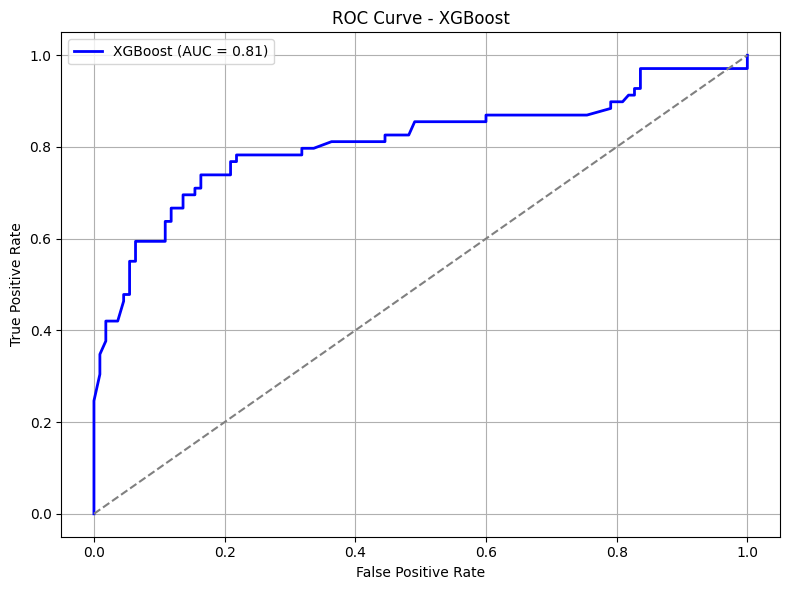

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilities for positive class
y_proba_xgb = grid_xgb.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_proba_xgb)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})', color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
rf_best = grid_rf.best_estimator_


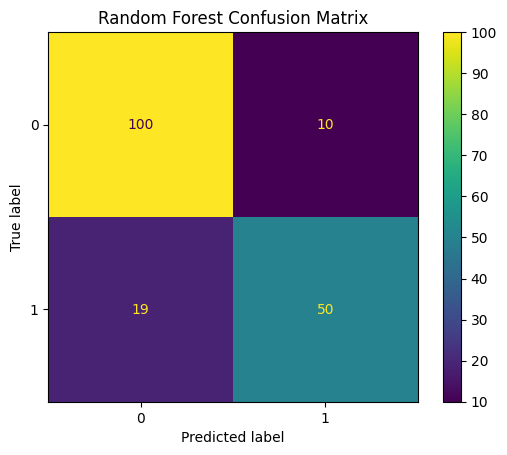

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred_rf = rf_best.predict(X_test)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.savefig('confusion_matrix_rffinedtunned.png', bbox_inches='tight', dpi=300)
plt.show()


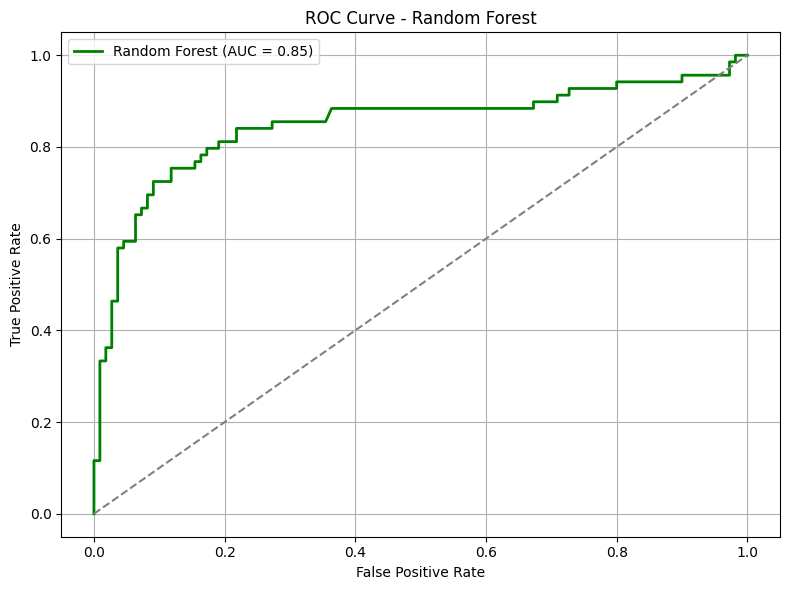

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for class 1
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]

# Compute AUC
auc_score_rf = roc_auc_score(y_test, y_proba_rf)

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf:.2f})', color='green', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_curve_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()


Plot ROC Curves Together

Tuned XGBoost AUC: 0.8099


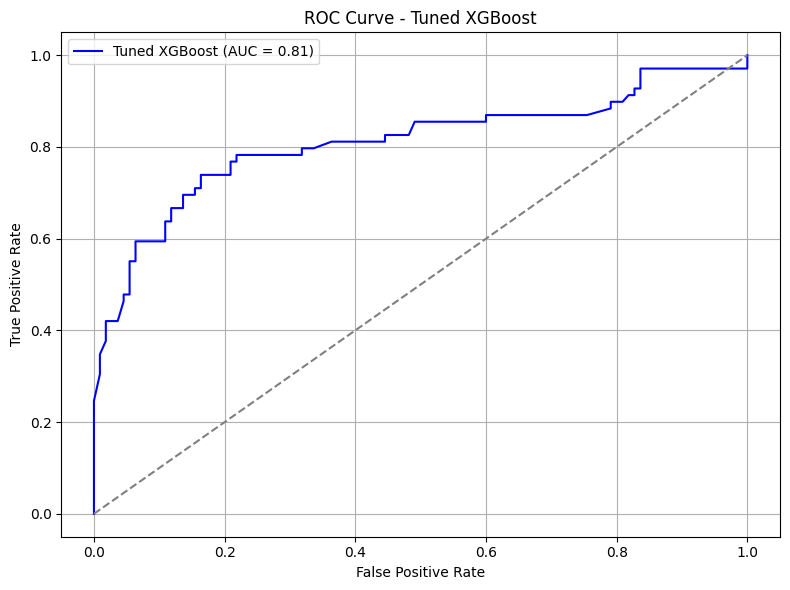

In [92]:
# Get the best tuned model from GridSearchCV
xgb_model = grid_xgb.best_estimator_

# Predict probabilities using the tuned model
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
auc_xgb = roc_auc_score(y_test, xgb_probs)

print(f"Tuned XGBoost AUC: {auc_xgb:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'Tuned XGBoost (AUC = {auc_xgb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('roc_curve_tuned_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()


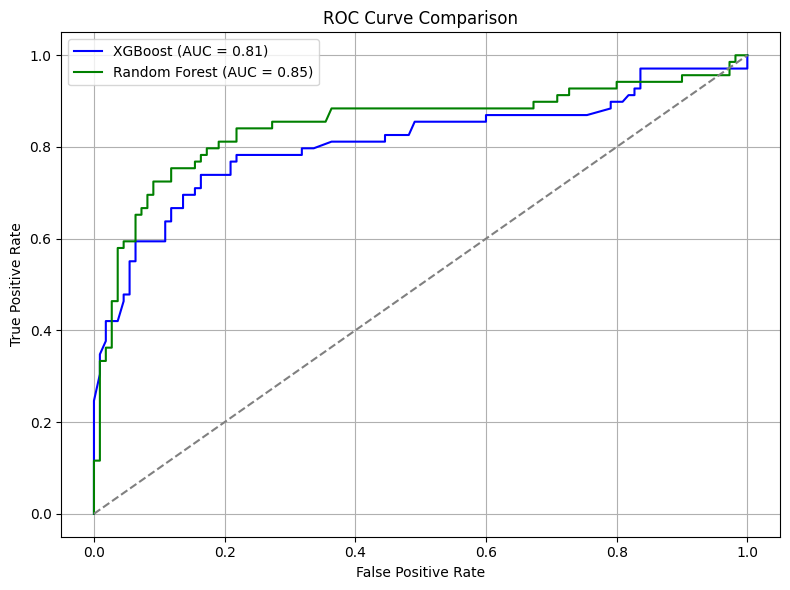

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
print(X_test.shape)

(179, 8)


In [ ]:
print(type(shap_values))  
print(shap_values.shape if hasattr(shap_values, 'shape') else 'No shape attribute')

# If Explanation object, access .values:
if hasattr(shap_values, 'values'):
    print(shap_values.values.shape)



<class 'shap._explanation.Explanation'>
(179, 8)
(179, 8)


In [ ]:
import joblib
joblib.dump(xgb_model, 'xgb_model.joblib')

# joblib.dump(preprocessor, 'preprocessor.joblib')


['xgb_model.joblib']

In [58]:
import joblib

# Save Random Forest model
joblib.dump(rf, 'rf_model.joblib')

['rf_model.joblib']

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [94]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


Logistic Regression Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

KNN Accuracy: 0.6424581005586593
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       110
           1       0.54      0.45      0.49        69

    accuracy                           0.64       179
   macro avg       0.62      0.61      0.61       179
weighted avg       0.63      0.64      0.63       179

SVM Accuracy: 0.6201117318435754
              precision    recall  f1-score   support

           0       0.64      0.86      0.74       110
           1       0.52      0.23      0.32        69

    accuracy                           0.62       179
   macro avg 

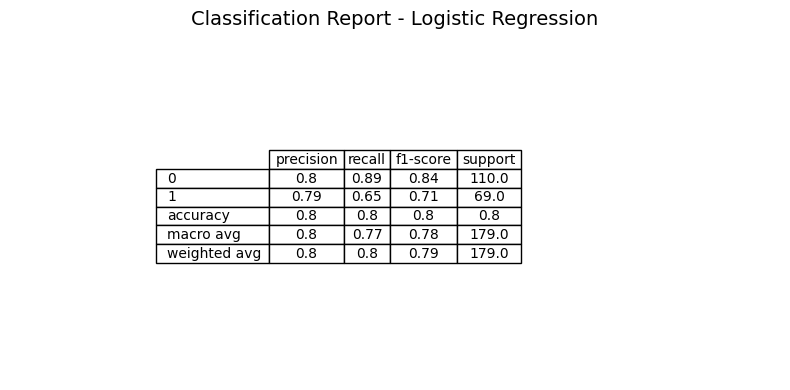

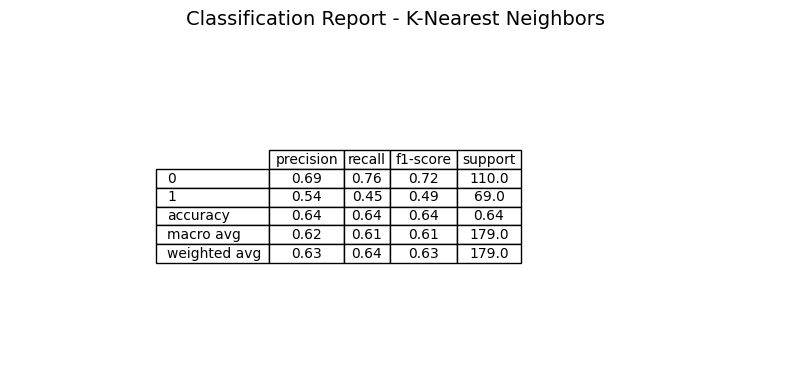

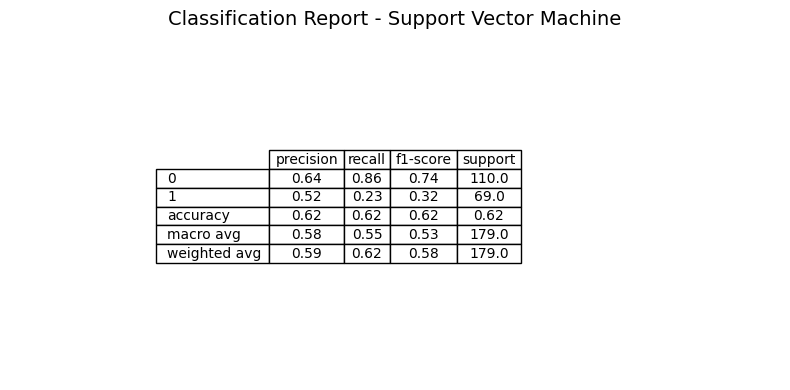

In [93]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

def classification_report_df(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report_dict).transpose().round(2)
    return df

def plot_and_save_report(df, model_name):
    fig, ax = plt.subplots(figsize=(8, len(df)*0.6 + 1))
    ax.axis('off')
    
    table = ax.table(
        cellText=df.values,
        rowLabels=df.index,
        colLabels=df.columns,
        cellLoc='center',
        loc='center'
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))
    
    plt.title(f'Classification Report - {model_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'classification_report_{model_name.lower().replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Generate DataFrames for each
lr_df = classification_report_df(y_test, lr_preds)
knn_df = classification_report_df(y_test, knn_preds)
svm_df = classification_report_df(y_test, svm_preds)

# Plot and save images separately
plot_and_save_report(lr_df, "Logistic Regression")
plot_and_save_report(knn_df, "K-Nearest Neighbors")
plot_and_save_report(svm_df, "Support Vector Machine")

In [90]:
# Predict probabilities
lr_probs = lr.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
rf_probs = rf_best.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]


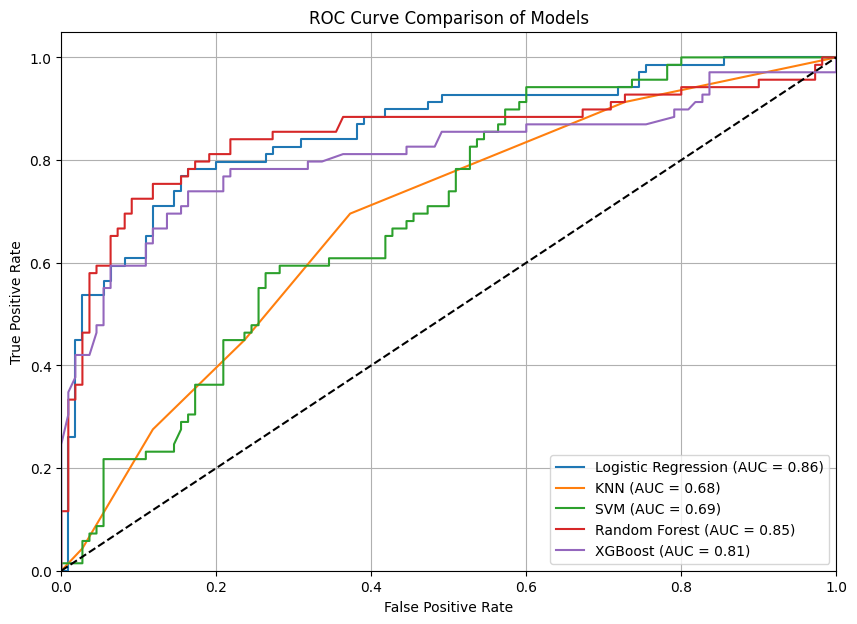

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

# Compute AUCs
auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('roc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


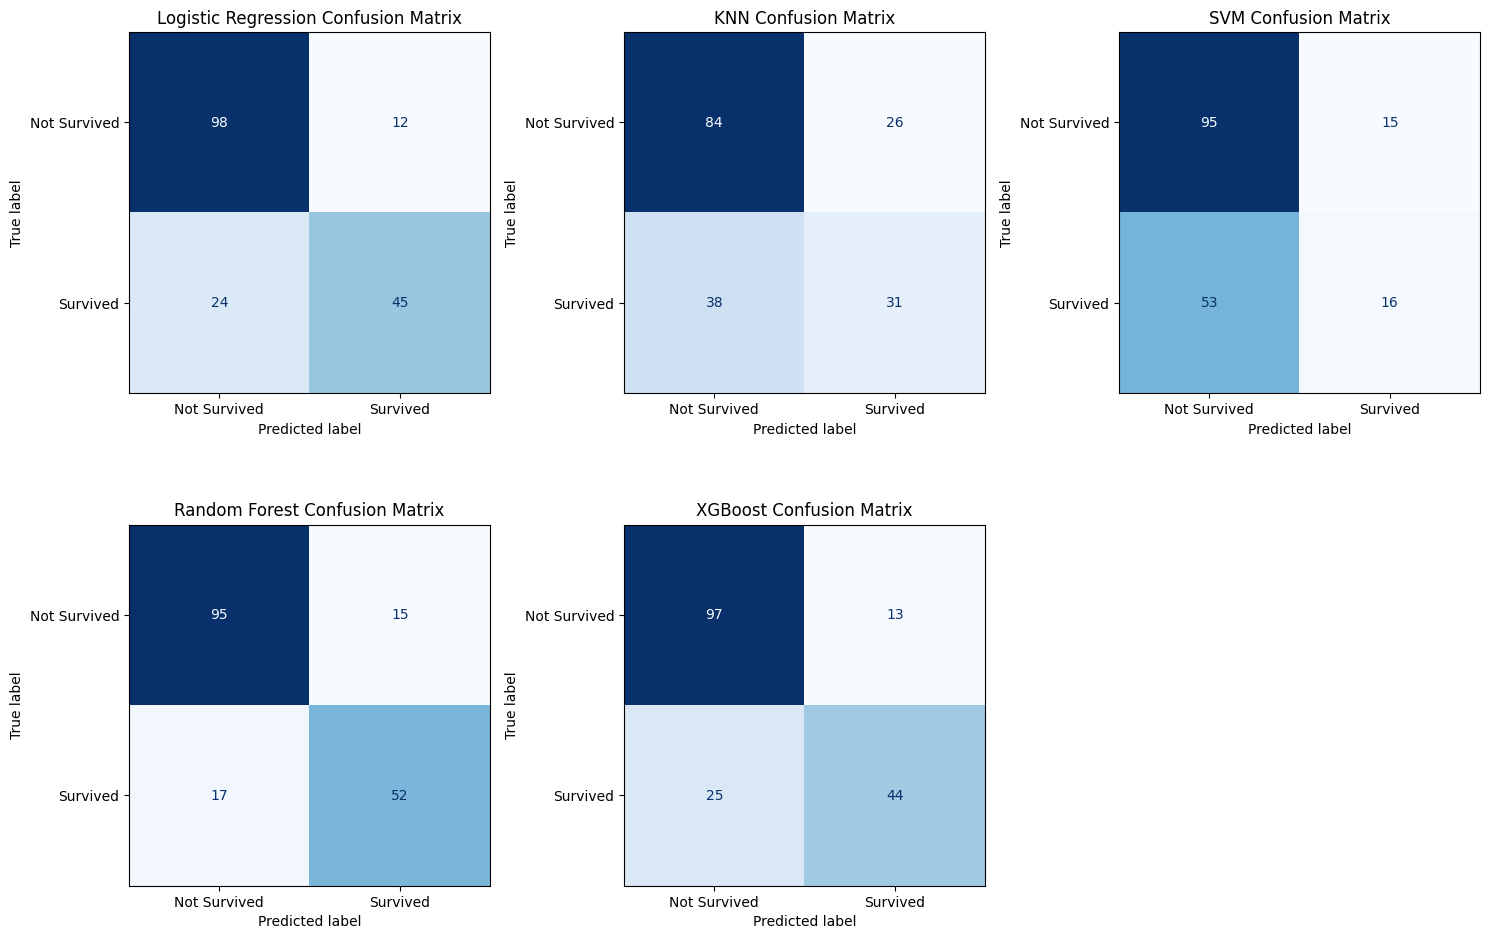

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict class labels
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Create a dictionary for easy looping
models_preds = {
    'Logistic Regression': y_pred_lr,
    'KNN': y_pred_knn,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

# Plot confusion matrices 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (name, preds) in enumerate(models_preds.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
    axes[i].set_title(f"{name} Confusion Matrix")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('confusion_matrices_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best LR Params:", grid_lr.best_params_)
print("Best LR Score:", grid_lr.best_score_)

best_lr = grid_lr.best_estimator_
lr_preds = best_lr.predict(X_test)
print(classification_report(y_test, lr_preds))


Best LR Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR Score: 0.8020486555697822
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.61      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179



In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Default logistic regression
lr_default = LogisticRegression(max_iter=1000)
lr_default.fit(X_train, y_train)
default_preds = lr_default.predict(X_test)
print("Default LR Accuracy:", accuracy_score(y_test, default_preds))

# Tuned logistic regression from GridSearchCV
best_lr = grid_lr.best_estimator_
tuned_preds = best_lr.predict(X_test)
print("Tuned LR Accuracy:", accuracy_score(y_test, tuned_preds))


Default LR Accuracy: 0.7988826815642458
Tuned LR Accuracy: 0.776536312849162


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # inverse of regularization strength
    'penalty': ['l2'],
    'solver': ['lbfgs']  
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best parameters:", grid_lr.best_params_)
print("Best CV score:", grid_lr.best_score_)

best_lr = grid_lr.best_estimator_
y_pred = best_lr.predict(X_test)
print("Tuned LR Test Accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.8020486555697822
Tuned LR Test Accuracy: 0.776536312849162


In [ ]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best SVM Score:", grid_svm.best_score_)

best_svm = grid_svm.best_estimator_
svm_preds = best_svm.predict(X_test)
print(classification_report(y_test, svm_preds))


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best Logistic Regression Score:", grid_lr.best_score_)

# Evaluate on test set
lr_best = grid_lr.best_estimator_
y_pred_lr_best = lr_best.predict(X_test)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print(classification_report(y_test, y_pred_lr_best))


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Score: 0.8020486555697822
Tuned Logistic Regression Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.61      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179

